#  Permutation Importances of sklearn(Emotions dataset)

In [1]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn import metrics

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

## Import the dataset

In [2]:
# Read the CSV file
dataset = pd.read_csv('emotions.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :-6]
y = dataset.iloc[:, -6:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (593, 78)
X.shape: (593, 72)


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68,0.014937,136,2,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.070075,0.041565,0.295031,70,0.276366,140,2,0.343547,0.276366,0.710924
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.079917,0.085821,0.161574,61,0.000000,183,3,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.129145,0.122330,0.043012,66,0.206562,132,2,0.102839,0.241934,0.351009
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.284196,0.189988,0.029308,100,0.144039,200,2,0.195196,0.310801,0.683817


y.shape: (593, 6)


,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,1,1,0,0,0
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0


Descriptive stats:


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,0.109876,0.107114,0.230008,74.456998,0.247854,155.215852,2.099494,0.412940,0.354901,0.959906
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.053819,0.059361,0.295863,14.610203,0.366541,29.807954,0.316040,0.339559,0.362262,0.651827
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.032472,0.031945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,0.075211,0.071286,0.047611,64.000000,0.007556,132.000000,2.000000,0.179411,0.099424,0.513974
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,0.096668,0.088687,0.104043,71.000000,0.077408,150.000000,2.000000,0.309902,0.246193,0.804229
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,0.125772,0.121432,0.278203,84.000000,0.325489,180.000000,2.000000,0.529859,0.472593,1.242089
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,0.471506,0.415202,1.598533,115.000000,1.762948,237.000000,3.000000,1.795128,1.797765,3.422899


In [3]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (415, 72)
X_test.shape: (178, 72)
y_train.shape: (415, 6)
y_test.shape: (178, 6)


## ClassifierChain

In [4]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(RandomForestClassifier(criterion='entropy'), order='random', random_state=0)
chain_clf.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(criterion='entropy'),
                order='random', random_state=0)

## MultiOutputClassifier

In [5]:
from sklearn.multioutput import MultiOutputClassifier
MO_clf = MultiOutputClassifier(RandomForestClassifier(criterion='entropy'), n_jobs=-1)
MO_clf.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(criterion='entropy'),
                      n_jobs=-1)

## transform the shape of data from dataframe to array

In [6]:
X_train_array=X_train.values
y_train_array=y_train.values
X_test_array=X_test.values
y_test_array=y_test.values

## MLkNN

In [7]:
from skmultilearn.adapt import MLkNN

MLkNN_clf = MLkNN(k=3)

# train
MLkNN_clf.fit(X_train_array, y_train_array)


MLkNN(k=3)

## Binary Relevance Classifier

In [8]:
from skmultilearn.problem_transform import BinaryRelevance

# initialize Binary Relevance multi-label classifier
# with randomforest classifier


br_clf = BinaryRelevance(
    classifier = RandomForestClassifier(criterion='entropy'),
    require_dense = [False, True]
)

# train
br_clf.fit(X_train_array, y_train_array)

BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy'),
                require_dense=[False, True])

## Classifier Chains(scikit multi-learn)

In [9]:
from skmultilearn.problem_transform import ClassifierChain

# initialize Classifier Chain multi-label classifier
# with randomforest classifier

cc_clf2 = ClassifierChain(
    classifier = RandomForestClassifier(criterion='entropy'),
    require_dense = [False, True]
)

# train
cc_clf2.fit(X_train_array, y_train_array)


ClassifierChain(classifier=RandomForestClassifier(criterion='entropy'),
                require_dense=[False, True])

## Label Powerset

In [10]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

# initialize LabelPowerset multi-label classifier with a RandomForest
lp_clf = ClassifierChain(
    classifier = RandomForestClassifier(n_estimators=100),
    require_dense = [False, True]
)

# train
lp_clf.fit(X_train_array, y_train_array)


ClassifierChain(classifier=RandomForestClassifier(),
                require_dense=[False, True])

## sklearn permutation_importance

In [11]:
from sklearn.inspection import permutation_importance

## Set the size of figure

In [12]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)   # unit: inches

## result_chain_clf

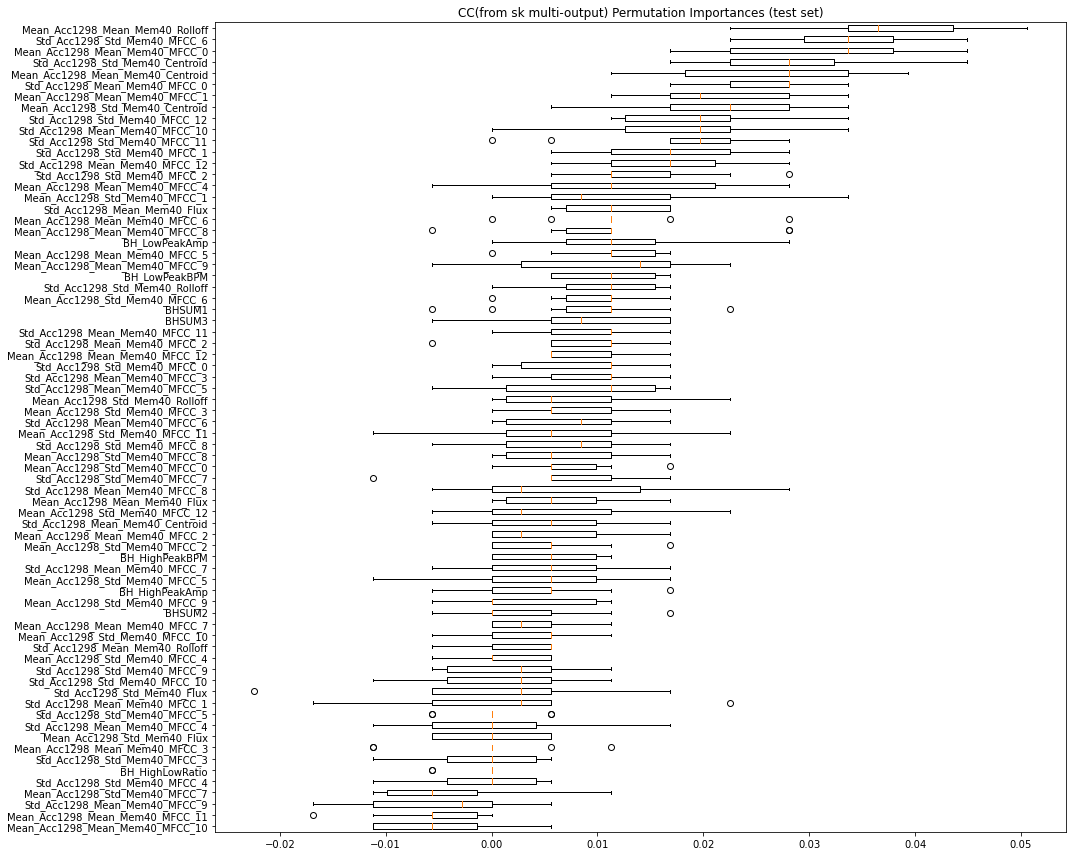

In [14]:
result_chain_clf = permutation_importance(chain_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_chain_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_chain_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("CC(from sk multi-output) Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_MO_clf

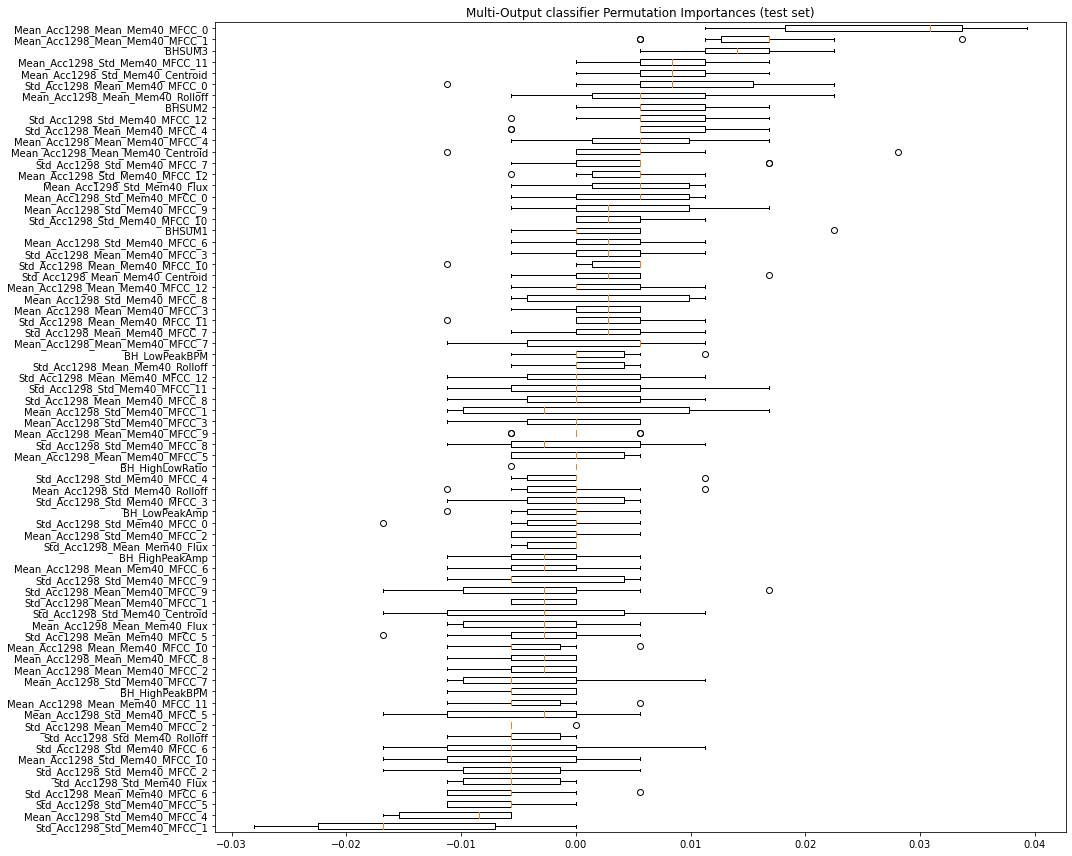

In [15]:
result_MO_clf = permutation_importance(MO_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_MO_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_MO_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Multi-Output classifier Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_MLkNN_clf

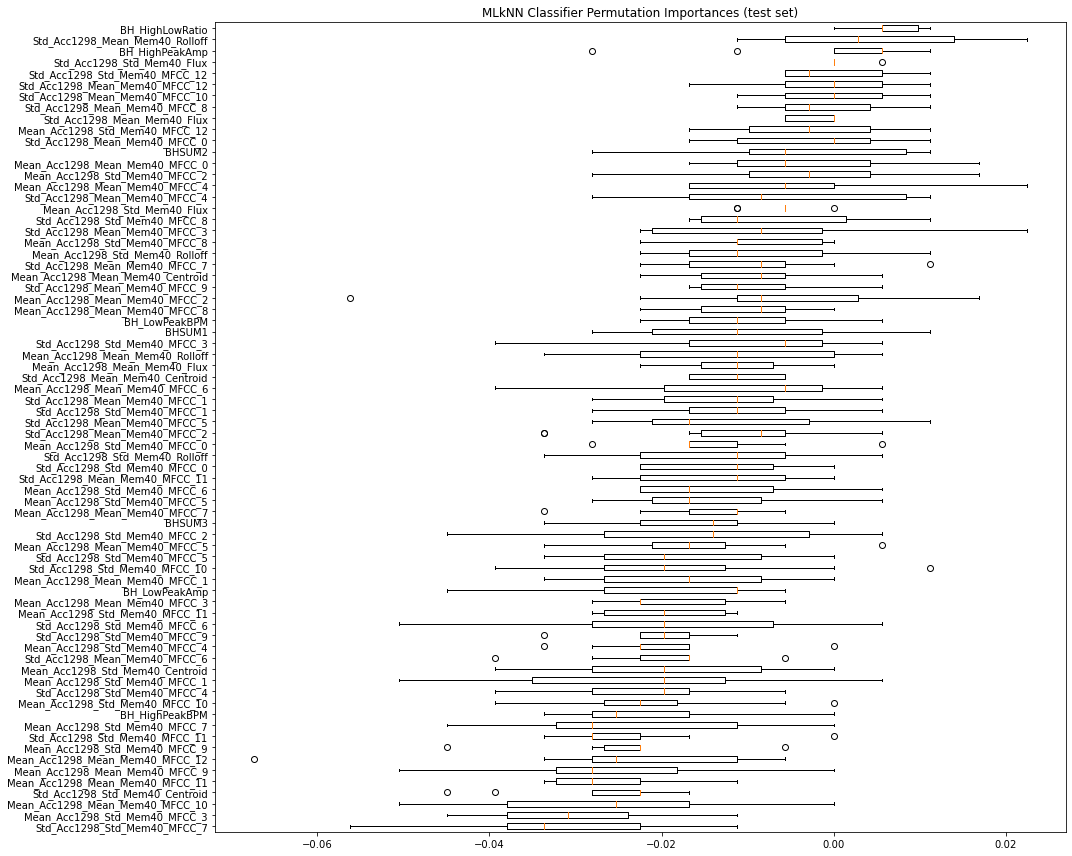

In [16]:
result_MLkNN_clf = permutation_importance(MLkNN_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_MLkNN_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_MLkNN_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("MLkNN Classifier Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_br_clf

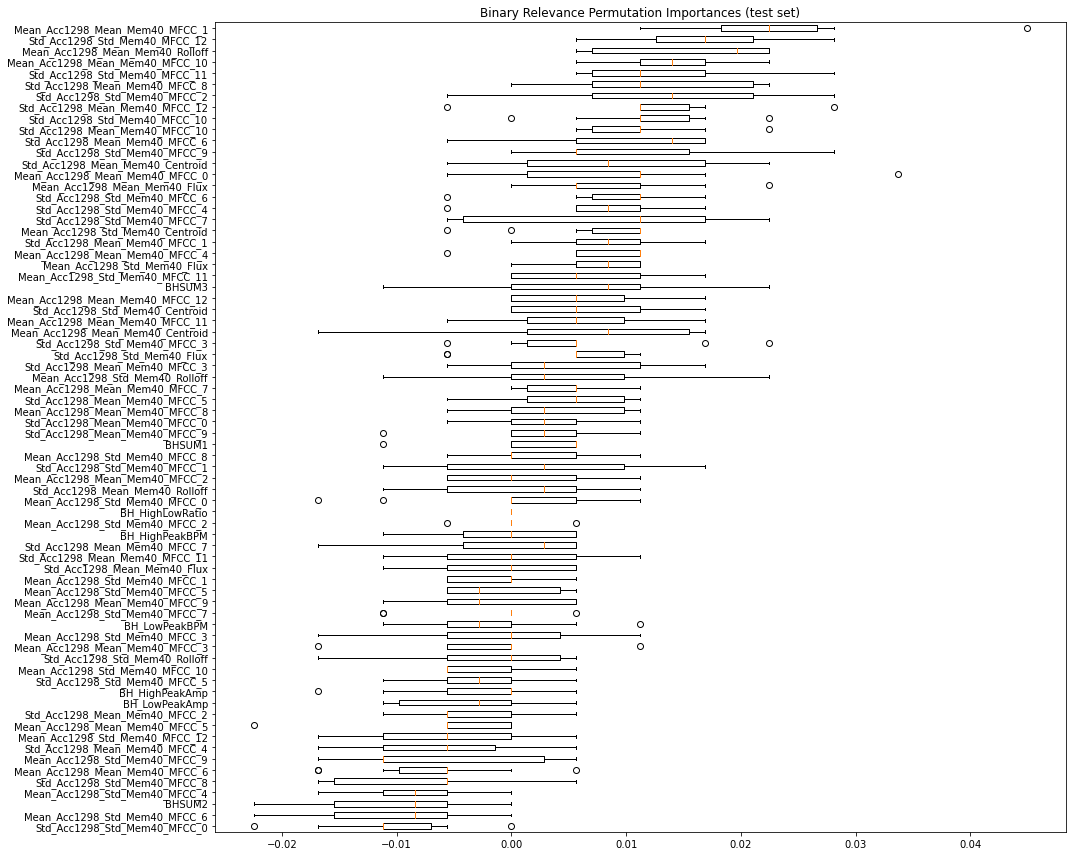

In [17]:
result_br_clf = permutation_importance(br_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_br_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_br_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Binary Relevance Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_cc_clf2

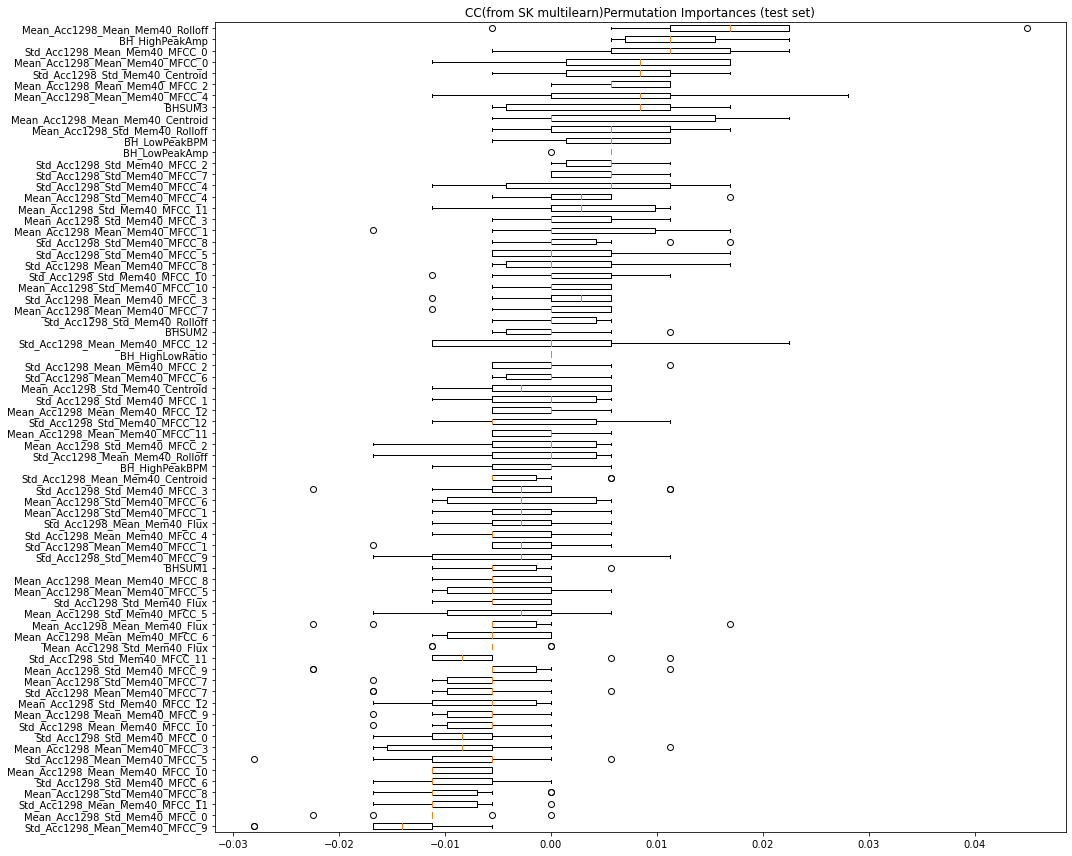

In [18]:
result_cc_clf2 = permutation_importance(cc_clf2, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_cc_clf2.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_cc_clf2.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("CC(from SK multilearn)Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## result_lp_clf

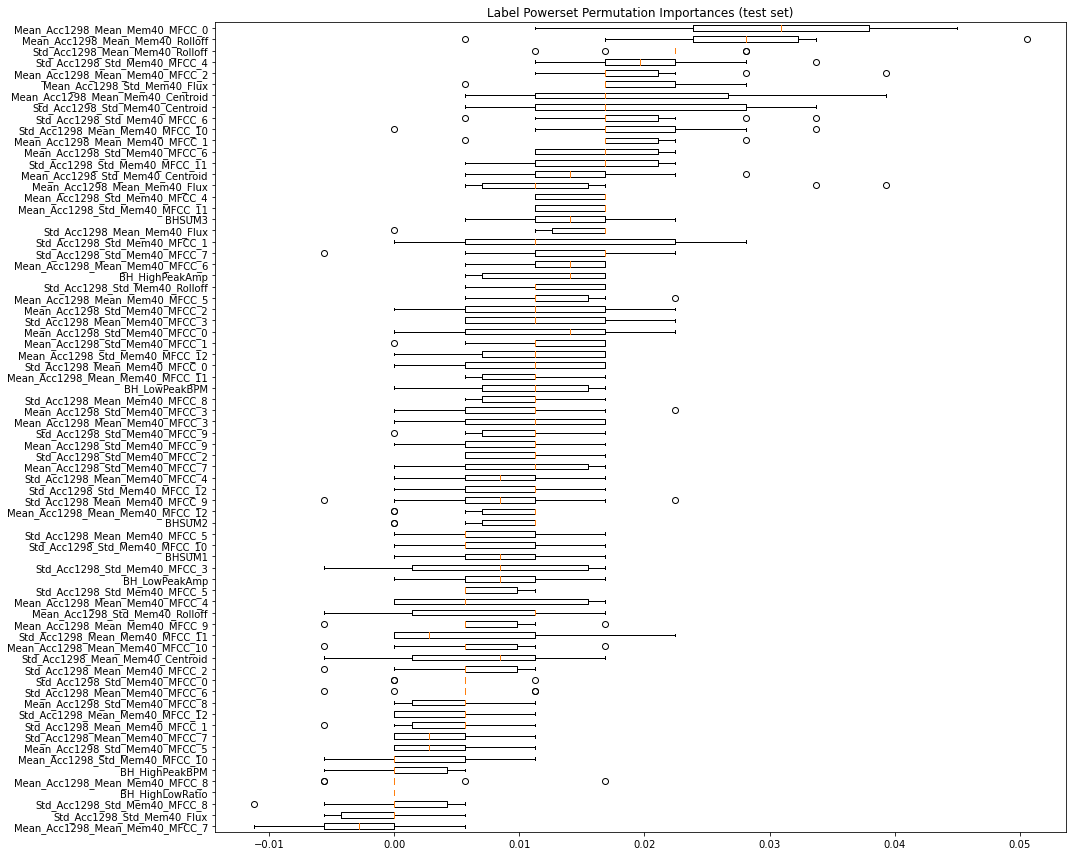

In [19]:
result_lp_clf = permutation_importance(lp_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_lp_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_lp_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Label Powerset Permutation Importances (test set)")
fig.tight_layout()
plt.show()
